In [1]:
import pandas as pd
#Load the dataset
df = pd.read_csv('C:/Users/anjan/OneDrive/Desktop/MSC Project reference papers/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [3]:
#Checking duplicates
df.duplicated().sum()

0

In [4]:
#Type conversion
df['SeniorCitizen'] = df['SeniorCitizen'].astype('category')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')
df[['SeniorCitizen', 'TotalCharges']].dtypes

SeniorCitizen    category
TotalCharges      float64
dtype: object

In [5]:
# Checking if there are any missing values were created
df['TotalCharges'].isnull().sum()

11

In [6]:
#Dropping the rows where the Column 'TotalCharges' has null values
df = df.dropna(subset=['TotalCharges'])
df['TotalCharges'].isnull().sum()

0

In [7]:
#Dropping the column 'CustomerID' as its not useful
df = df.drop('customerID', axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
#Finding categorical columns
df.select_dtypes(include=['object', 'category']).columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [9]:
#One-hot encoding to change the categorical columns to Binary
df_model = pd.get_dummies(df, drop_first=True)
df_model.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,1,29.85,29.85,False,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,34,56.95,1889.50,True,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,2,53.85,108.15,True,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,45,42.30,1840.75,True,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,2,70.70,151.65,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True


In [10]:
#train-Test Split
from sklearn.model_selection import train_test_split

X = df_model.drop('Churn_Yes', axis=1)  # All features
y = df_model['Churn_Yes']              # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [11]:
y.value_counts(normalize=True)

Churn_Yes
False    0.734215
True     0.265785
Name: proportion, dtype: float64

In [12]:
from collections import Counter
from imblearn.over_sampling import SMOTE
print('Original dataset shape %s' % Counter(y_train))
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_train_sm))

Original dataset shape Counter({False: 4130, True: 1495})
Resampled dataset shape Counter({False: 4130, True: 4130})


In [17]:
#LogisticRegression with SMOTE:


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf = LogisticRegression(max_iter=10000, random_state=0)
clf.fit(X_train_sm, y_train_sm)

acc = accuracy_score(y_test, clf.predict(X_test)) * 100
print(f"Logistic Regression model accuracy: {acc:.2f}%")

y_pred = clf.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



Logistic Regression model accuracy: 77.33%
Accuracy: 0.7732764747690121
[[840 193]
 [126 248]]
              precision    recall  f1-score   support

       False       0.87      0.81      0.84      1033
        True       0.56      0.66      0.61       374

    accuracy                           0.77      1407
   macro avg       0.72      0.74      0.72      1407
weighted avg       0.79      0.77      0.78      1407



In [23]:
#LogisticRegression without SMOTE:


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clr = LogisticRegression(max_iter=10000, random_state=0)
clr.fit(X_train, y_train)

acc = accuracy_score(y_test, clr.predict(X_test)) * 100
print(f"Logistic Regression model accuracy: {acc:.2f}%")

y_pred = clr.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix

y_pred = clr.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Logistic Regression model accuracy: 80.45%
Accuracy: 0.8045486851457001
[[916 117]
 [158 216]]
              precision    recall  f1-score   support

       False       0.85      0.89      0.87      1033
        True       0.65      0.58      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



In [19]:
#RandomForest with SMOTE
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train_sm, y_train_sm)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.78

Classification Report:
               precision    recall  f1-score   support

       False       0.86      0.84      0.85      1033
        True       0.58      0.61      0.59       374

    accuracy                           0.78      1407
   macro avg       0.72      0.72      0.72      1407
weighted avg       0.78      0.78      0.78      1407



In [20]:
#RandomForest without SMOTE
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.79

Classification Report:
               precision    recall  f1-score   support

       False       0.83      0.89      0.86      1033
        True       0.62      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407



In [ ]:
!pip install shap

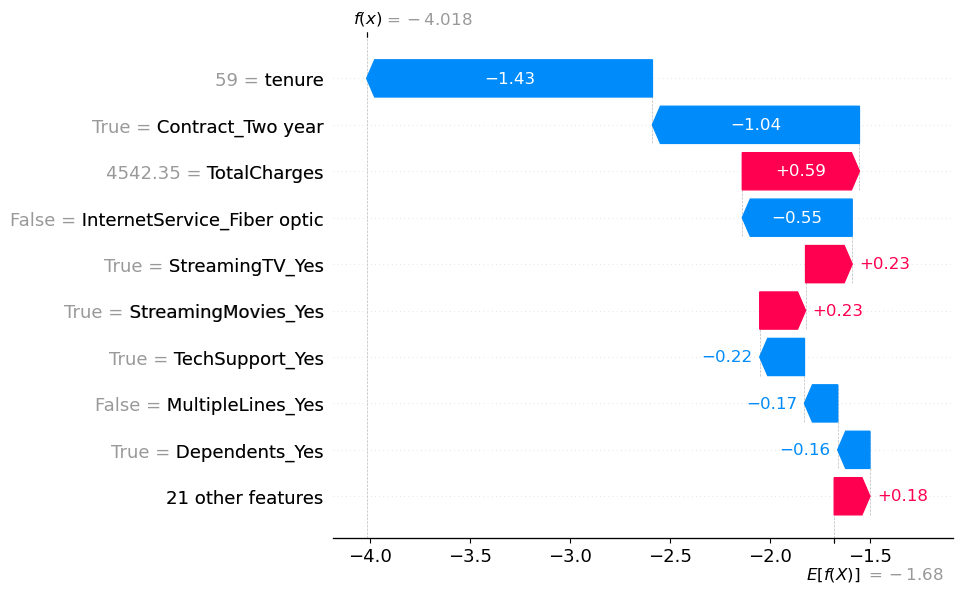

In [45]:
# SHAP for Logistic Regression without SMOTE:
import shap
explainer = shap.LinearExplainer(clr, X_train)
shap_values = explainer(X_test)
shap.initjs()
shap.waterfall_plot(shap_values[0])

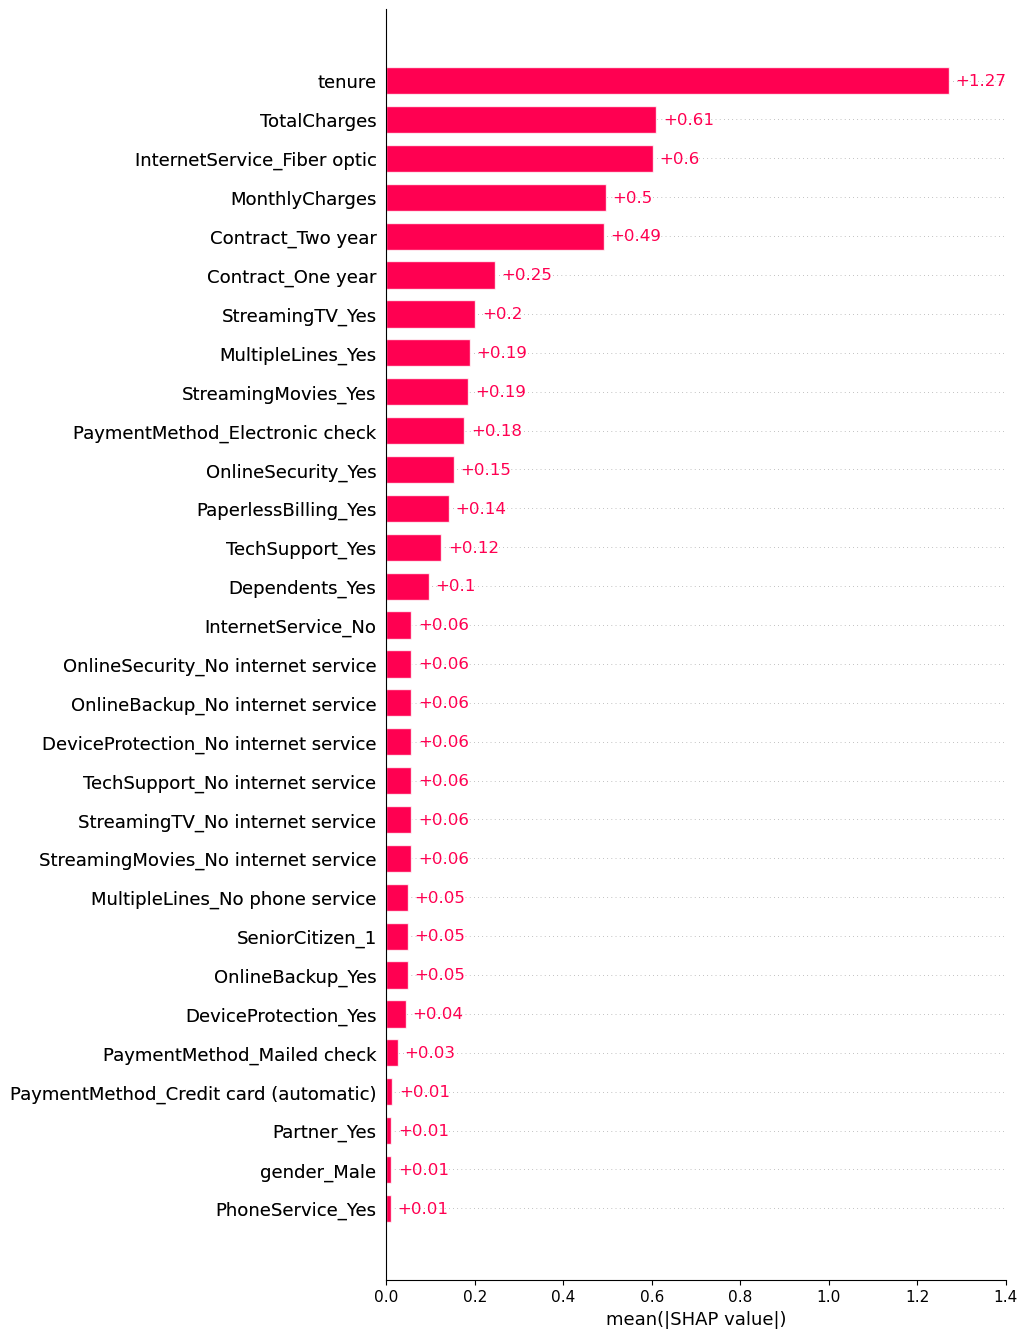

In [52]:
shap.plots.bar(shap_values, max_display=30)


In [56]:
#FairnessCheck:
# 4️⃣ Function for Fairness Metrics
from fairlearn.metrics import demographic_parity_difference, demographic_parity_ratio, equalized_odds_difference

def fairness_report(y_true, y_pred, sensitive_feature):
    return {
        'accuracy': accuracy_score(y_true, y_pred),
        'selection_rate_by_group': pd.Series(y_pred).groupby(sensitive_feature).mean(),
        'dp_diff': demographic_parity_difference(y_true, y_pred, sensitive_features=sensitive_feature),
        'dp_ratio': demographic_parity_ratio(y_true, y_pred, sensitive_features=sensitive_feature),
        'eo_diff': equalized_odds_difference(y_true, y_pred, sensitive_features=sensitive_feature)
    }

# 5️⃣ Fairness check for sensitive features
for S_COL in ['SeniorCitizen_1', 'Partner_Yes', 'gender_Male']:
    print("\n====== Sensitive feature:", S_COL, "======")
    report = fairness_report(y_test, y_pred, X_test[S_COL])
    for k, v in report.items():
        print(f"{k}: {v}")



====== Sensitive feature: SeniorCitizen_1 ======
accuracy: 0.8045486851457001
selection_rate_by_group: SeniorCitizen_1
False    0.204545
True     0.324324
dtype: float64
dp_diff: 0.22757520176082172
dp_ratio: 0.4666924564796905
eo_diff: 0.15746934225195094

====== Sensitive feature: Partner_Yes ======
accuracy: 0.8045486851457001
selection_rate_by_group: Partner_Yes
False    0.260870
True     0.176471
dtype: float64
dp_diff: 0.19685879593939934
dp_ratio: 0.4014212221029646
eo_diff: 0.23712686567164176

====== Sensitive feature: gender_Male ======
accuracy: 0.8045486851457001
selection_rate_by_group: gender_Male
False    0.250000
True     0.198582
dtype: float64
dp_diff: 0.010885790220992453
dp_ratio: 0.9550713749060857
eo_diff: 0.03208556149732622
